In [1]:
import matplotlib.pyplot as plt
from segmentation import *
!pwd

2022-02-02 02:20:04.100181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-02 02:20:04.100226: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/mnt/c/Users/Melih Sami Özaydın/Desktop/Yüksek Lisans/MSc_Projects/BM5113 - Bilgisayarla Görme/final_kısım_I


## Segmentation

In [2]:
num_classes = 4

### Load Data
* img: [B, 224, 224, 3]
*  mask: [B, 224,224,20]

In [3]:
trainX, testX, trainY, testY, lb = load_data(dataset_path="./data/data-raw", mode="segmentation", num_classes=num_classes, multi_class=True)
trainX.shape, trainY.shape, testX.shape, testY.shape

[INFO] veri yukleniyor...
[INFO] classes:['background', 'BOTTLE_OPENER', 'BREAD_KNIFE', 'CAN_OPENER', 'DESSERT_SPOON']
num_classes: 5
sample count:  106


imagePath: dessertspoonraw9.JPG, maskPath: dessertspoonbinary9.png, className: DESSERT_SPOON: 100%|██████████| 106/106 [00:05<00:00, 17.88it/s] 


((79, 224, 224, 3), (79, 224, 224, 5), (27, 224, 224, 3), (27, 224, 224, 5))

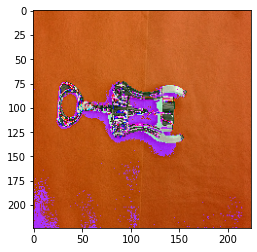

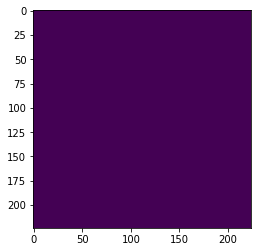

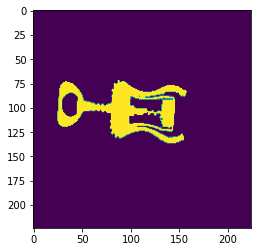

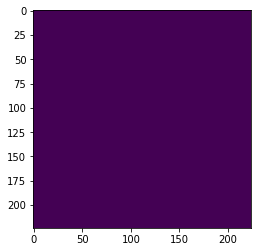

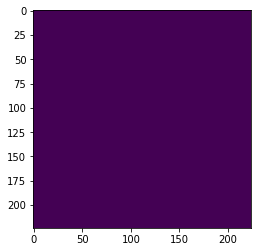

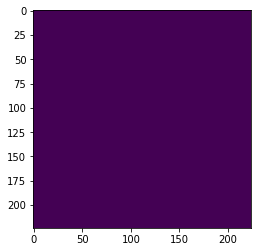

(255, 255)

In [13]:
idx = np.random.randint(0, len(trainX))

plt.imshow(trainX[idx])
plt.show()
for i in range(num_classes+1):
    plt.imshow(trainY[idx][:,:,i])
    plt.show()
trainX[0].max(), trainY[0].max()

## Load Model

In [14]:
from unet import Unet

input_shape=(224, 224, 3)
classes=2

model = Unet(input_shape=input_shape, classes=num_classes)
model.summary()

pd = model.summary()
pd

2022-02-02 02:22:11.795532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/melihozaydin/.virtualenvs/YL/lib/python3.8/site-packages/cv2/../../lib64:
2022-02-02 02:22:11.795572: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-02 02:22:11.795589: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Mete): /proc/driver/nvidia/version does not exist
2022-02-02 02:22:11.795745: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             